In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats # For statistical functions
from sklearn.model_selection import train_test_split # Splitting train and test data

Importing datasets

In [ ]:
df1 = pd.read_csv(r'C:\Users\pjr\OneDrive\Documents\data science\Recommender system\archive (1)\Books.csv')
df2 = pd.read_csv(r'C:\Users\pjr\OneDrive\Documents\data science\Recommender system\archive (1)\Ratings.csv')
df3 = pd.read_csv(r'C:\Users\pjr\OneDrive\Documents\data science\Recommender system\archive (1)\Users.csv')

C:\Users\pjr\AppData\Local\Temp\ipykernel_13152\1986335104.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r'C:\Users\pjr\OneDrive\Documents\data science\Recommender system\archive (1)\Books.csv')


Understanding this dataset

In [ ]:
# df1 Books
print(df1.shape) # No of rows and columns 
df1.head() # First 5 rows in the dataset

(271360, 8)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
df1.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [ ]:
df1.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],inplace=True)

In [ ]:
# df2 Ratings
print(df2.shape)
df2.head()

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# df3 Users 
print(df3.shape)
df3.head()

(278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
df1.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271360,271360,271359,271360,271358
unique,271360,242135,102023,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


In [ ]:
df3.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


Data Cleaning

In [ ]:
df1.duplicated() #  Check for duplicates in rows 

0         False
1         False
2         False
3         False
4         False
          ...  
271355    False
271356    False
271357    False
271358    False
271359    False
Length: 271360, dtype: bool

In [ ]:
df2.duplicated()


0          False
1          False
2          False
3          False
4          False
           ...  
1149775    False
1149776    False
1149777    False
1149778    False
1149779    False
Length: 1149780, dtype: bool

In [ ]:
df3.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
278853    False
278854    False
278855    False
278856    False
278857    False
Length: 278858, dtype: bool

In [ ]:
df1.nunique().sort_values(ascending=False) 

ISBN                   271360
Book-Title             242135
Book-Author            102023
Publisher               16807
Year-Of-Publication       202
dtype: int64

In [ ]:
df1['Year-Of-Publication'] = pd.to_numeric(df1['Year-Of-Publication'], errors='coerce')

In [ ]:
# Dealing with null values of df1(Books)
df1.isnull().sum().sort_values(ascending=True)

ISBN                   0
Book-Title             0
Book-Author            1
Publisher              2
Year-Of-Publication    3
dtype: int64

In [ ]:
# Remove rows with null values 
df1 = df1.dropna(subset=['Book-Author','Publisher','Year-Of-Publication'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271354 non-null  object 
 1   Book-Title           271354 non-null  object 
 2   Book-Author          271354 non-null  object 
 3   Year-Of-Publication  271354 non-null  float64
 4   Publisher            271354 non-null  object 
dtypes: float64(1), object(4)
memory usage: 12.4+ MB


In [ ]:
df2.isnull().sum().sort_values(ascending=True)

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
df3.isnull().sum().sort_values(ascending=True)

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
# Dealing with null values of df3(User's age)
df3['Age'].dropna(inplace=True)

Dealing with outliers 

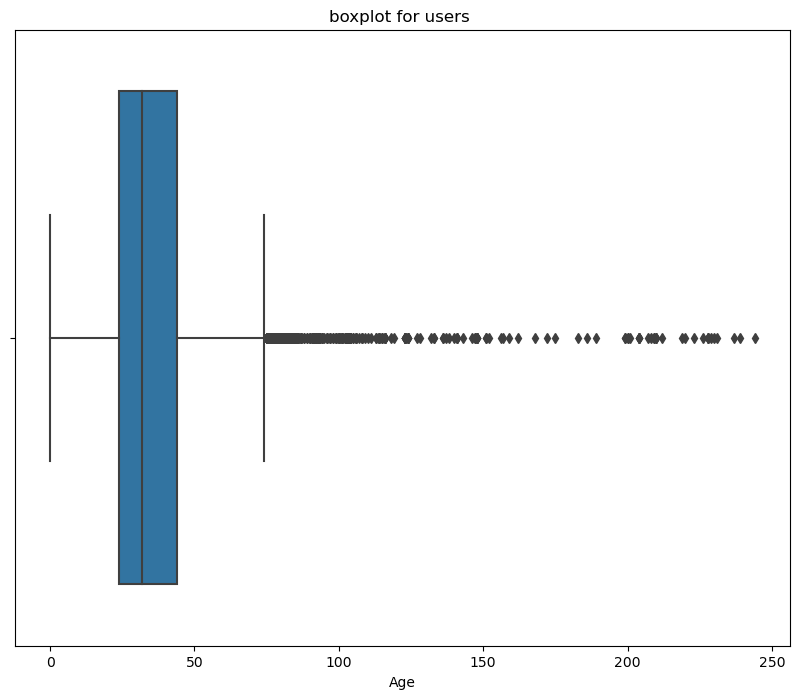

In [ ]:
# df3
plt.figure(figsize=(10,8))
plt.title('boxplot for users ')
sns.boxplot(data=df3, x='Age')
plt.show()

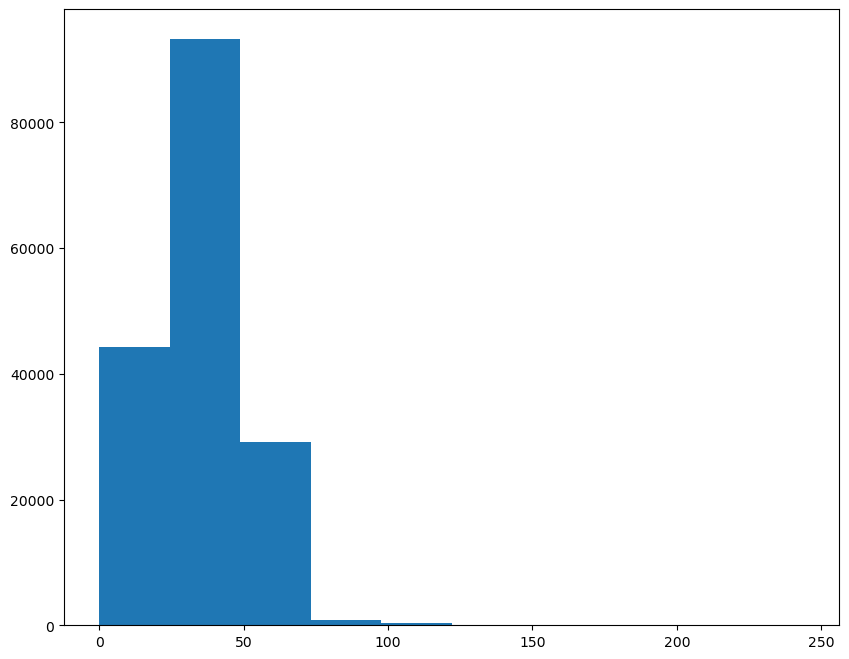

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(data=df3, x = 'Age')
plt.show()

In [ ]:
def find_boundaries(data,variable):
    # Finding the IQR
    Q1 = data[variable].quantile(.25)
    Q3 = data[variable].quantile(.75)
    IQR = Q3 - Q1
    # Finding lower and upper bounadry
    l_boundary = Q1 - 1.5 * IQR
    u_boundary = Q3 + 1.5 * IQR 
    return l_boundary, u_boundary

l_column , u_column = find_boundaries(df3, 'Age')
print("Lower boundary is: ", l_column)
print("Upper boundary is: ", u_column)


Lower boundary is:  -6.0
Upper boundary is:  74.0


In [ ]:
remove = np.where(df3['Age'] > 74, True,
                  np.where(df3['Age'] < 10, True, False))

df3 = df3.loc[~(remove)]


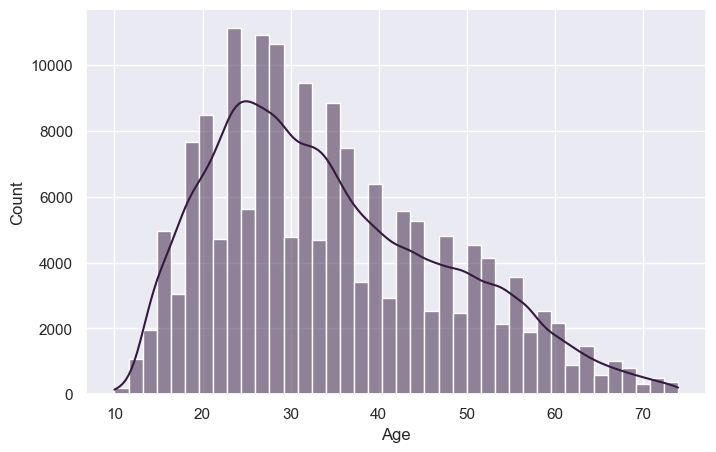

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid',palette="rocket")
ax =  sns.histplot(data=df3, x= 'Age', kde=True, bins=40)

<Axes: >

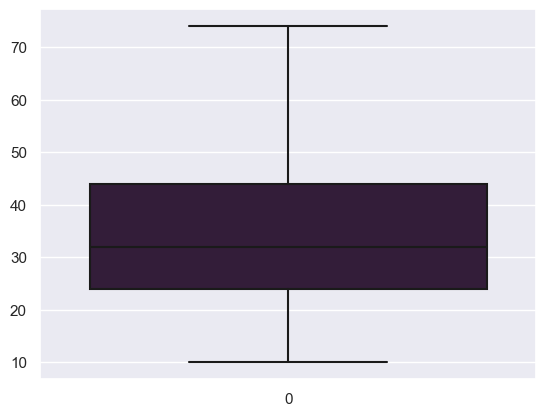

In [ ]:
sns.boxplot(df3['Age'])

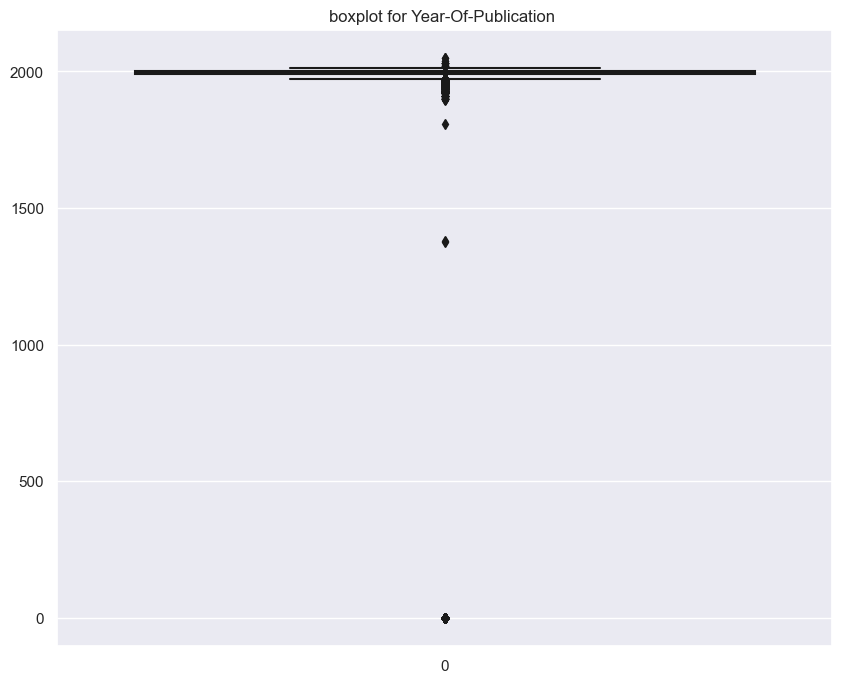

In [ ]:
# df1
plt.figure(figsize=(10,8))
plt.title('boxplot for Year-Of-Publication ')
sns.boxplot(df1['Year-Of-Publication'])
plt.show()

<Axes: xlabel='Year-Of-Publication', ylabel='Count'>

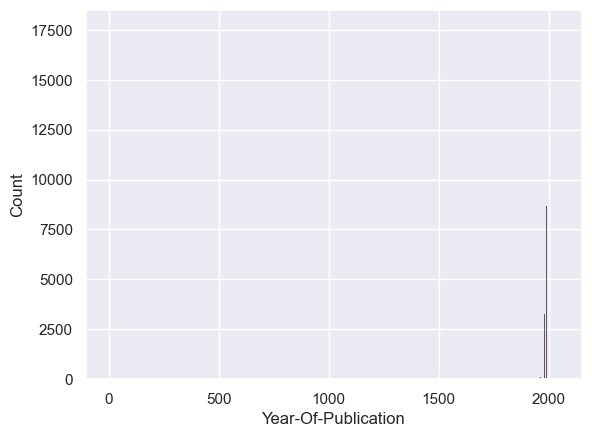

In [ ]:
# df1['Year-Of-Publication'].plot(kind='hist')
sns.histplot(df1['Year-Of-Publication'])

In [ ]:
lb_column,ub_column = find_boundaries(df1, 'Year-Of-Publication')
print("Lower boundary is: ", lb_column)
print("Upper boundary is: ", ub_column)

Lower boundary is:  1972.5
Upper boundary is:  2016.5


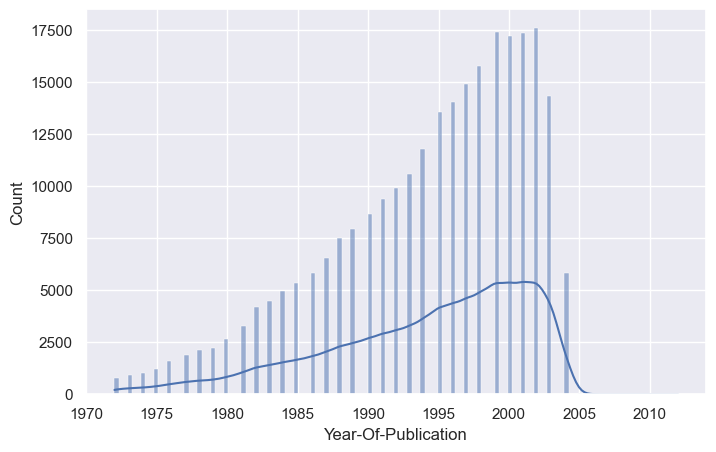

In [ ]:
remove_year = np.where(df1['Year-Of-Publication'] < 1972, True,
                       np.where(df1['Year-Of-Publication'] > 2016, True, False))
df1 = df1.loc[~(remove_year)]

# Histogram for year of population 
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
ax = sns.histplot(data=df1, x = 'Year-Of-Publication', kde=True)

Dealing with categorical data 

In [ ]:
# Construct new attribute
df3['Country'] = df3['Location'].str.extract(r',\s*([^,]+)$')

In [ ]:
df3.head()

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom


In [ ]:
df3.drop(columns=['Location'], inplace=True)

In [ ]:
country_counts = df3['Country'].value_counts()
print(country_counts)

usa                138677
canada              21534
united kingdom      18388
germany             16922
spain               13050
                    ...  
myanmar                 1
carter                  1
usa & canada            1
p.r.china               1
united kingdom.         1
Name: Country, Length: 699, dtype: int64


([<matplotlib.patches.Wedge at 0x1e7949c6b30>,
 [Text(-0.03297701222864079, 1.099505578278015, 'usa'),
  Text(-1.0480560696594037, -0.3340336432907368, 'canada'),
  Text(-0.790185819688052, -0.765249221080245, 'united kingdom'),
  Text(-0.4221083580231079, -1.0157876422200833, 'germany'),
  Text(-0.052630156942868433, -1.0987402179679095, 'spain'),
  Text(0.25842658490288245, -1.0692126543468485, 'australia'),
  Text(0.5282154355982186, -0.9648774293120264, 'italy'),
  Text(0.6829035003958567, -0.8623472671418901, 'france'),
  Text(0.74762900832514, -0.8068772310028136, 'portugal'),
  Text(0.8046948917797547, -0.7499774204224877, 'new zealand'),
  Text(0.8551624758049117, -0.6918794258938576, 'netherlands'),
  Text(0.8916456044549484, -0.6441801891211572, 'switzerland'),
  Text(0.9160659414641031, -0.6089525358264686, 'brazil'),
  Text(0.937458296970651, -0.5754754047228142, 'china'),
  Text(0.9560995648817218, -0.5439426642882341, 'sweden'),
  Text(0.9725023411242647, -0.5140420182318

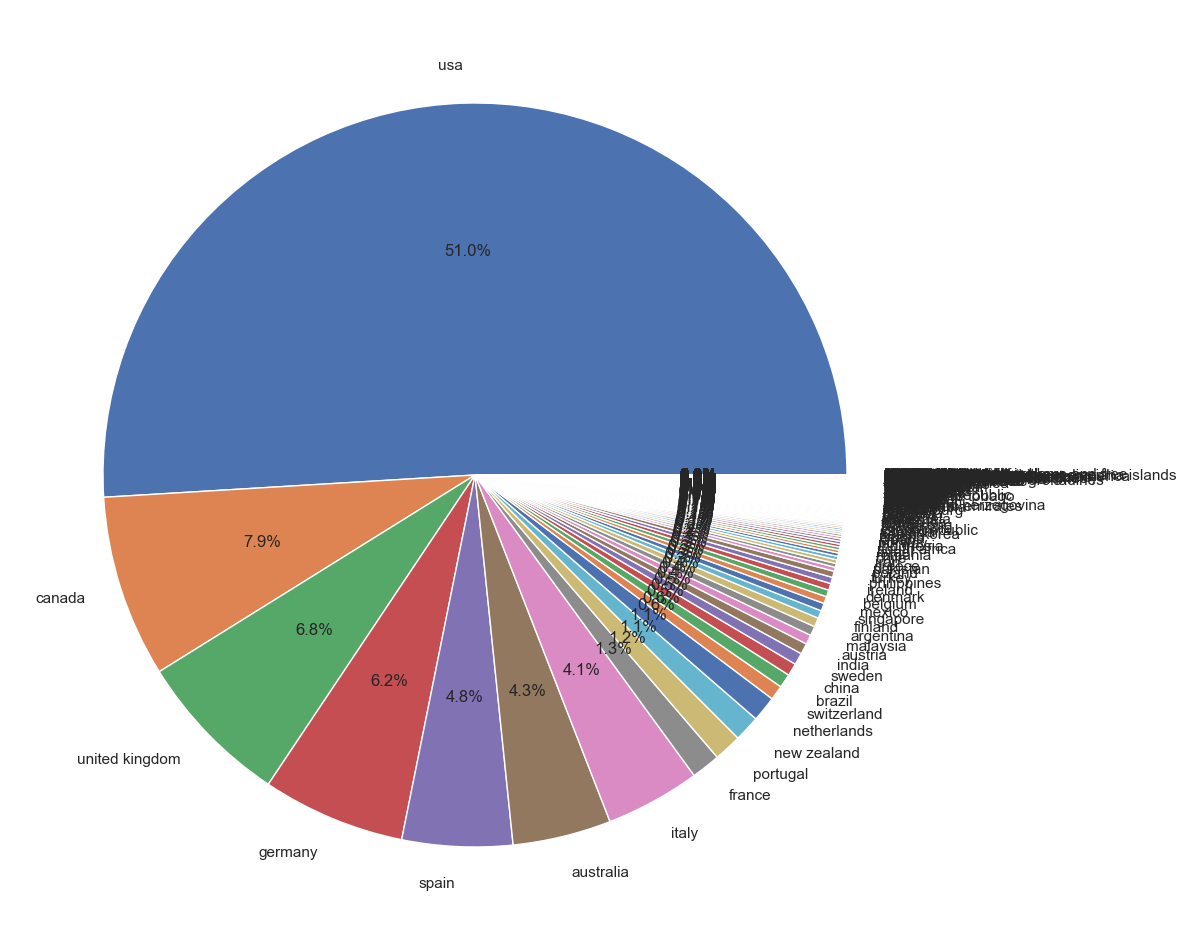

In [ ]:
plt.figure(figsize=(12,16))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')

Merging the diferent dataframes 

In [ ]:
df_merge = pd.merge(df1,df2, on='ISBN', how='inner')

In [ ]:
final_df = pd.merge(df_merge, df3, on='User-ID', how='inner')

In [ ]:
print(final_df.shape)
final_df.head()

(997948, 9)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,2,0,18.0,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5,NaN,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,8,0,NaN,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,8,0,NaN,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,8,0,NaN,canada


In [ ]:
# Identifing unique values
print("The total dataset has ", final_df.shape[0]," values.")
print("The dataset has ", final_df['ISBN'].nunique(), " books with unique values")
print("The dataset has ", final_df['User-ID'].nunique(), " users with unique values")
print("The dataset has ", sorted(final_df['Book-Rating'].unique()), " ratings.")



The total dataset has  997948  values.


The dataset has  260351  books with unique values
The dataset has  89539  users with unique values
The dataset has  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  ratings.


<Axes: >

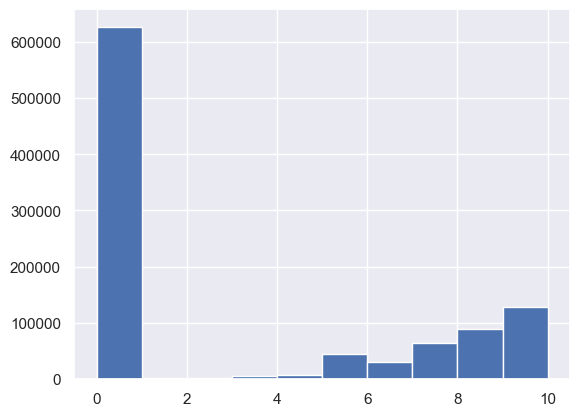

In [ ]:
final_df['Book-Rating'].hist()

In [ ]:
final_df.isnull().sum().sort_values(ascending=True)

ISBN                        0
Book-Title                  0
Book-Author                 0
Year-Of-Publication         0
Publisher                   0
User-ID                     0
Book-Rating                 0
Country                 23567
Age                    271701
dtype: int64

In [ ]:
final_df.dropna(subset=['Age','Country'], inplace=True)
print(final_df.shape)

(716018, 9)


In [ ]:
author_counts = final_df['Book-Author'].value_counts()
print(author_counts)

Stephen King               7435
Nora Roberts               6240
John Grisham               4016
James Patterson            3971
Mary Higgins Clark         3272
                           ... 
Paul Harrison                 1
Louise Boije af GennÃ¤s       1
Kay E. Powell                 1
Kyra Mesich                   1
Michael Gorman                1
Name: Book-Author, Length: 83817, dtype: int64


Transforming categorical data and splitting train and test data

In [ ]:
# Divide data into training and vlidation subsets 
x_train, x_test, y_train, y_test = train_test_split(final_df[['Book-Title','User-ID','Book-Author','Publisher','Country','Year-Of-Publication','Book-Rating','Age']]
                                                    ,final_df['ISBN'], train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
cat_variable = ['Book-Author','Publisher','Country']

In [ ]:
# Frequency Encoding Technique
encoder_dict = {}
for var in cat_variable:
    encoder_dict[var] = (x_train[var].value_counts()/len(x_train)).to_dict()
    

encoder_dict

{'Book-Author': {'Stephen King': 0.010427468602373546,
  'Nora Roberts': 0.00870963349359478,
  'John Grisham': 0.005575981033983108,
  'James Patterson': 0.005539319918856732,
  'Mary Higgins Clark': 0.004587876692957923,
  'Dean R. Koontz': 0.0044290118607436275,
  'Tom Clancy': 0.003720230301633689,
  'Danielle Steel': 0.0037045183951509566,
  'Sue Grafton': 0.003316958035243552,
  'Janet Evanovich': 0.0032610934788605025,
  'Anne Rice': 0.0032314154332820076,
  'J. K. Rowling': 0.0031092117161940873,
  'V.C. Andrews': 0.0030865167401634736,
  'Rich Shapero': 0.0029468553492058504,
  'Michael Crichton': 0.0028333804690527814,
  'JOHN GRISHAM': 0.002698956380256069,
  'R. L. Stine': 0.0025558034545245054,
  'Nicholas Sparks': 0.0025470746175896538,
  'Sandra Brown': 0.002541837315428743,
  'Dan Brown': 0.0024248709005017335,
  'Patricia Daniels Cornwell': 0.0023044129508007836,
  'Agatha Christie': 0.0022869552769310807,
  'Catherine Coulter': 0.0022031584423565067,
  'Anita Shreve':

In [ ]:
# Replace the categorical value with numeric value
for var in cat_variable:
    x_train[var] = x_train[var].map(encoder_dict[var])


In [ ]:
print(x_train.shape)
x_train.head()

(572814, 8)


,Book-Title,User-ID,Book-Author,Publisher,Country,Year-Of-Publication,Book-Rating,Age
985458,Das GummibÃ?Â¤rchen- Orakel.,133482,Dietmar Bittrich,Goldmann,germany,1998.0,0,25.0
438957,Gap Creek: The Story Of A Marriage,200226,Robert Morgan,Touchstone,canada,2000.0,0,39.0
58181,Eyes of Prey,55492,John Sandford,Berkley Publishing Group,usa,2004.0,0,43.0
209674,Timeless Wisdom: Illuminating Thoughts on the ...,30898,Gary Fenchuk,Cake Eaters Inc,usa,2000.0,8,43.0
61793,The Autograph Man: A Novel (Vintage Internatio...,76352,Zadie Smith,Vintage Books USA,usa,2003.0,0,58.0


In [ ]:

train_df = pd.concat([y_train, x_train], axis=1)
train_df.head()

,ISBN,Book-Title,User-ID,Book-Author,Publisher,Country,Year-Of-Publication,Book-Rating,Age
985458,3442441641,Das GummibÃ?Â¤rchen- Orakel.,133482,Dietmar Bittrich,Goldmann,germany,1998.0,0,25.0
438957,0743203631,Gap Creek: The Story Of A Marriage,200226,Robert Morgan,Touchstone,canada,2000.0,0,39.0
58181,0425132048,Eyes of Prey,55492,John Sandford,Berkley Publishing Group,usa,2004.0,0,43.0
209674,0964490234,Timeless Wisdom: Illuminating Thoughts on the ...,30898,Gary Fenchuk,Cake Eaters Inc,usa,2000.0,8,43.0
61793,037570387X,The Autograph Man: A Novel (Vintage Internatio...,76352,Zadie Smith,Vintage Books USA,usa,2003.0,0,58.0


In [ ]:
# Identifing unique values in the train df
print("The total dataset has ", train_df.shape[0]," values.")
print("The dataset has ", train_df['ISBN'].nunique(), " books with unique values")
print("The dataset has ", train_df['User-ID'].nunique(), " users with unique values")
print("The dataset has ", sorted(train_df['Book-Rating'].unique()), " ratings.")



The total dataset has  572814  values.
The dataset has  191516  books with unique values
The dataset has  45526  users with unique values
The dataset has  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  ratings.


In [ ]:
# Group movies by column showing number and mean of rating for each book
agg_rating = train_df.groupby('ISBN').agg(rating_count = ('Book-Rating','count'),
                                          rating_mean = ('Book-Rating', 'mean')).reset_index()
print(agg_rating)
agg_rating.info()

              ISBN  rating_count  rating_mean
0       0001046713             1          0.0
1       0001046934             1          0.0
2       0001047663             1          0.0
3       0001047868             1          0.0
4       0001047973             1          9.0
...            ...           ...          ...
191511  B0001PBXMS             1          0.0
191512  B0001PIOX4             1          0.0
191513  B000234N3A             1          9.0
191514  B000234N76             1          0.0
191515  B000234NC6             1          0.0

[191516 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191516 entries, 0 to 191515
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ISBN          191516 non-null  object 
 1   rating_count  191516 non-null  int64  
 2   rating_mean   191516 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.4+ MB


In [ ]:
# Filter books with 50+ ratings only
popular_books = agg_rating[agg_rating['rating_count']>= 50]
print(len(popular_books))

869


In [ ]:
popular_books.sort_values(by='rating_count', ascending=False).head()
popular_books.sort_values(by='rating_count', ascending=False).tail()

NameError: name 'popular_books' is not defined

User item Matrix